### Pre-processing EEG data with MNE-Python
Datagenerated in BrainVision Recorder software (.vhdr, .eeg, .vmrk)

In [1]:
import mne
import pandas as pd

#### Loading data

In [2]:
#Subject files 0004
path = f'data_brainvision/'
name_file = ['Metzler0004.eeg', 'Metzler0004.vhdr', 'Metzler0004.vmrk']
file = [path + name for name in name_file]

#Reading EEG files
raw_data = mne.io.read_raw_brainvision(file[1], preload=True) #Preloading raw data into memory
raw_data

Extracting parameters from data_brainvision/Metzler0004.vhdr...
Setting channel info structure...
Reading 0 ... 1823139  =      0.000 ...  1823.139 secs...


<RawBrainVision | Metzler0004.eeg, 64 x 1823140 (1823.1 s), ~890.3 MB, data loaded>

Using matplotlib as 2D backend.
Opening raw-browser...


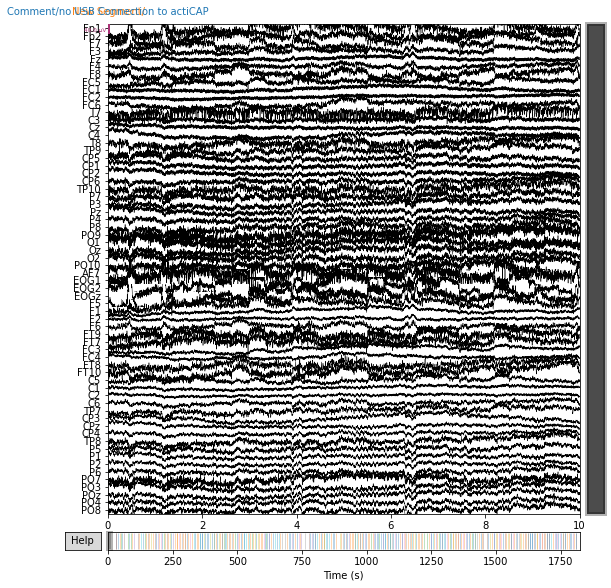

In [3]:
#Plotting raw data data from all channels
#Plot raw data with set size inches)
raw_data.plot(n_channels=64);

#### Working with metadata

In [4]:
#Viewing channel names
ch_names = raw_data.info['ch_names']
print(ch_names)

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'AF7', 'EOG1', 'EOG2', 'EOGz', 'F5', 'F1', 'F2', 'F6', 'FT9', 'FT7', 'FC3', 'FC4', 'FT8', 'FT10', 'C5', 'C1', 'C2', 'C6', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8']


In [5]:
#Setting the reference channel for eyes movement
raw_data.set_channel_types({'EOG1': 'eog', 'EOG2': 'eog', 'EOGz': 'eog'})

<RawBrainVision | Metzler0004.eeg, 64 x 1823140 (1823.1 s), ~890.3 MB, data loaded>

In [6]:
#Setting the 10-20 pattern in the channel position
raw_data.set_montage('standard_1020')

<RawBrainVision | Metzler0004.eeg, 64 x 1823140 (1823.1 s), ~890.3 MB, data loaded>

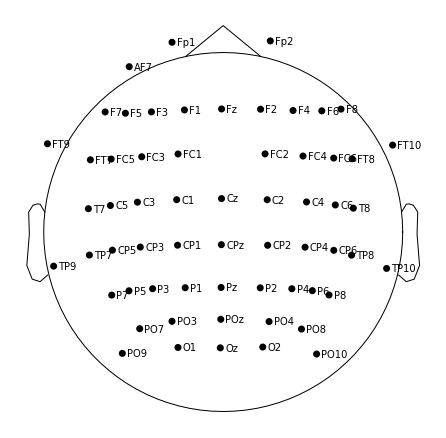

In [7]:
#Plotting the name and position of sensors
raw_data.plot_sensors(show_names=True);

#### Preprocessing (filters)

In [8]:
#Filter band-pass (low-pass = 0.1Hz and high-pass = 35Hz)
f_data = raw_data.copy().filter(l_freq=0.1, h_freq=35)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 33001 samples (33.001 sec)



Opening raw-browser...


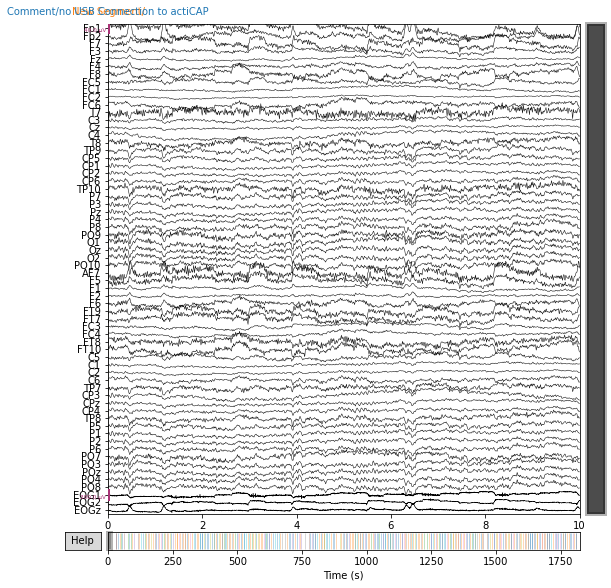

In [17]:
#Plotting after band-pass filter
f_data.plot(n_channels=64, title='Filtered data');

In [10]:
#Filter

#### Selecting channels eficientes

In [11]:
#Selecting only the frontal, parietal, and reference lobe channels for eye movement
s_data = f_data.copy().pick_channels(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'Fz',
                                      'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'Pz',
                                      'EOG1', 'EOG2', 'EOGz'])
s_data

<RawBrainVision | Metzler0004.eeg, 21 x 1823140 (1823.1 s), ~292.1 MB, data loaded>

Opening raw-browser...


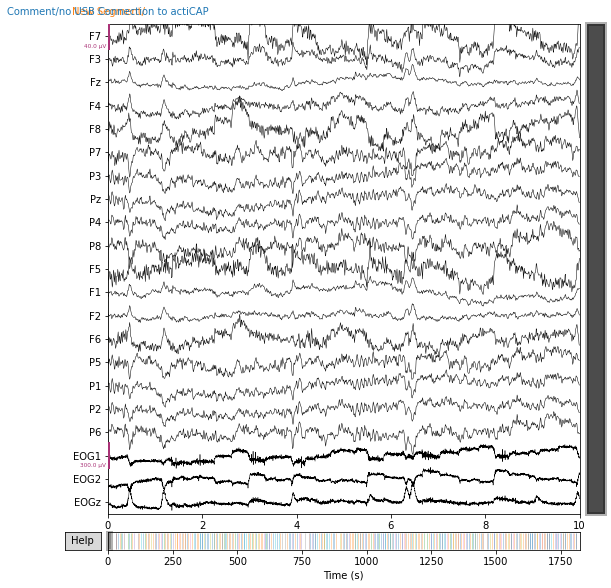

In [19]:
#Plotting filtered data from selected channels
s_data.plot(n_channels=21);

#### Trials

In [ ]:
#

#### Save dataset final

In [ ]:
#Datetime of the experiment
meas_date = s_data.info['meas_date']

#Dataframe with the events
dt_eeg = s_data.to_data_frame()

#Change time column to datetime type
dt_eeg['time'] = pd.to_datetime(dt_eeg['time'], unit='ms')

#Change dataframe index to a time column
#dt_eeg.index = dt_eeg.time

#To save the data in a .csv file